In [9]:
using DifferentialEquations, LinearAlgebra, Plots;

In [71]:
const C_t   = 1.3 # pF
const C_in  = 0.15 # pF
const C_out = 6.8 # pF
const C_sum = C_t + C_in + C_out

const R_t = 265. # Ω
const R_z = 50.  # Ω

const β = 0.05
const Φ₀ = 2.07e-15
const ϕ₀ = Φ₀ / (2π)

const f_s = 0.3
const kT = 1e-10

const I₀ = 0.4 # μA
const Eⱼ = I₀ * ϕ₀

const V_in = 6e-3; # mV

In [72]:
const C = [ C_in  -C_in    0;
           -C_in   C_sum  -C_out;
            0     -C_out   C_out];

const R = diagm([R_z, R_t, R_z]);

const N = sqrt(2 * kT * inv(R));

In [73]:
∇U₀(φ₂) = 2Eⱼ * cos(π * f_s) * sin(φ₂ + π * f_s);

In [74]:
∇U₁(φ₂) = β * ( -0.5 * Eⱼ * (sin(4π * f_s + 2φ₂) + sin(2φ₂)));

In [75]:
∇U(φ) = [0, ∇U₀(φ[2]) + ∇U₁(φ[2]), 0];

In [76]:
f(ddφ, dφ, φ, p, t) = ϕ₀ * (C * ddφ + inv(R) * dφ) + 1 \ ϕ₀ * ∇U(φ) + N * randn(3) + I_dr(t);

In [77]:
chirp(t) = V_in * sin(π * (t - 1e-9) / 2e-9) * sin(9π * (t - 1e-9) / 2e-9)

chirp (generic function with 1 method)

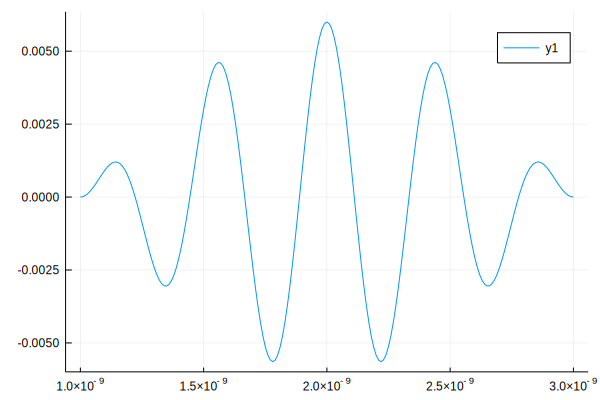

In [78]:
plot(chirp, 1e-9:1e-11:3e-9)

In [79]:
I_dr(t) = [t > 1e-9 && t < 3e-9 ? -chirp(t) / R_z : zero(t), zero(t), zero(t)]

I_dr (generic function with 1 method)

In [80]:
φ₀  = [0., -f_s * π, 0.]
dφ₀ = [0., 0., 0.]

tspan = (0., 4e-9);

In [81]:
prob = SecondOrderODEProblem(f, dφ₀, φ₀, tspan)

ODEProblem with uType ArrayPartition{Float64,Tuple{Array{Float64,1},Array{Float64,1}}} and tType Float64. In-place: true
timespan: (0.0, 4.0e-9)
u0: [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]

In [82]:
alg = IRKN4()
dt = 1e-12

1.0e-12

In [83]:
sol = solve(prob, alg=alg, dt=dt, abstol=1e-9, reltol=1e-9)

retcode: Success
Interpolation: 3rd order Hermite
t: 4002-element Array{Float64,1}:
 0.0
 1.0e-12
 2.0e-12
 3.0e-12
 4.0e-12
 5.0e-12
 5.9999999999999995e-12
 6.999999999999999e-12
 8.0e-12
 9.0e-12
 1.0e-11
 1.0999999999999999e-11
 1.1999999999999999e-11
 ⋮
 3.989999999999972e-9
 3.990999999999973e-9
 3.991999999999973e-9
 3.992999999999973e-9
 3.993999999999974e-9
 3.994999999999974e-9
 3.995999999999974e-9
 3.9969999999999745e-9
 3.997999999999975e-9
 3.998999999999975e-9
 3.9999999999999754e-9
 4.0e-9
u: 4002-element Array{ArrayPartition{Float64,Tuple{Array{Float64,1},Array{Float64,1}}},1}:
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.0][0.0, -0.9424777960769379, 0.0]
 [0.0, 0.0, 0.

In [86]:
φ̇₂ = [sol(t, Val{1}, idxs=4) for t in sol.t]

4002-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

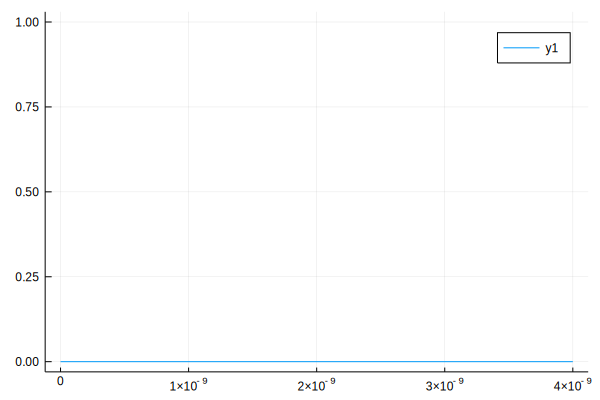

In [85]:
plot(sol.t, ϕ₀ * φ̇₂)